In [1]:
%pylab inline
import numpy as np
import os
import pylab as plt
import scipy.optimize as fit
from analyser import calculate_stat_corr, calculate_spattemp_corr
import time

Populating the interactive namespace from numpy and matplotlib


*N
*L
*startingTime
*maxTime
*timeDelay
*pFolder
*kValues
*k
*timeLength

# Creating correlations
## Static correlations

320000
Working on N32, L3.5


C:\DevelopiNation\vicsek_timedelay-2\correlation.py:296: RuntimeWarning: invalid value encountered in true_divide
  checkZero = np.where(krTensor>0, np.sin(krTensor)/krTensor, 1)


320000
Working on N32, L3.6
320000
Working on N32, L3.7
320000
Working on N32, L3.8000000000000003
320000
Working on N32, L3.9000000000000004
320000
Working on N32, L4.0
320000
Working on N32, L4.1000000000000005
320000
Working on N32, L4.200000000000001
320000
Working on N32, L4.300000000000001
320000
Working on N32, L4.4
320000
Working on N32, L4.500000000000001


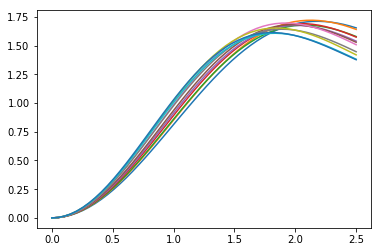

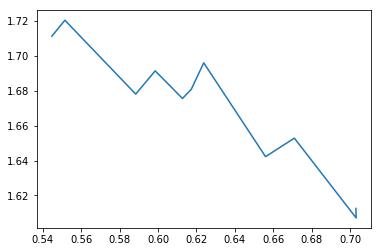

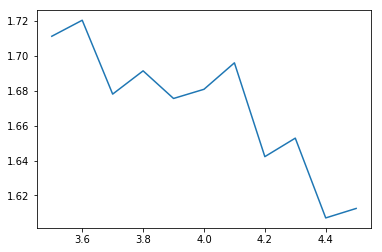

[0.55145716 3.6        1.72031361 2.14285714]
640000
Working on N64, L3.5
640000
Working on N64, L3.6
640000
Working on N64, L3.7
640000
Working on N64, L3.8000000000000003
640000
Working on N64, L3.9000000000000004
640000
Working on N64, L4.0
640000
Working on N64, L4.1000000000000005
640000
Working on N64, L4.200000000000001
640000
Working on N64, L4.300000000000001
640000
Working on N64, L4.4
640000
Working on N64, L4.500000000000001


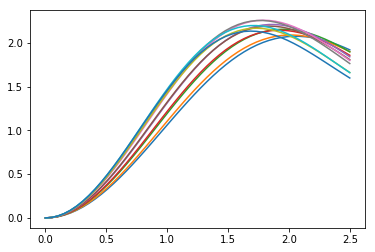

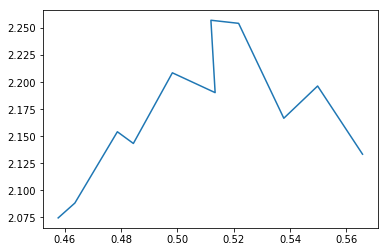

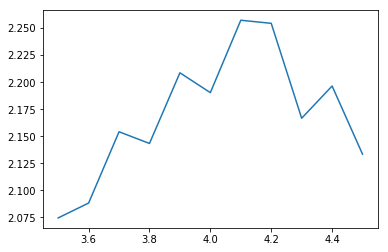

[0.51188654 4.1        2.25732052 1.78571429]
1280000
Working on N128, L4.5
1280000
Working on N128, L4.6
1280000
Working on N128, L4.699999999999999
1280000
Working on N128, L4.799999999999999
1280000
Working on N128, L4.899999999999999
1280000
Working on N128, L4.999999999999998
1280000
Working on N128, L5.099999999999998
1280000
Working on N128, L5.1999999999999975
1280000
Working on N128, L5.299999999999997
1280000
Working on N128, L5.399999999999997
1280000
Working on N128, L5.4999999999999964


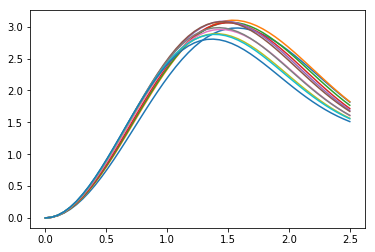

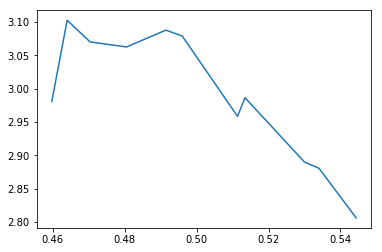

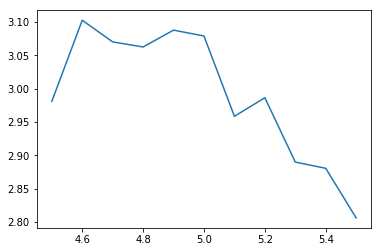

[0.4640537  4.6        3.10236908 1.53061224]
2560000
Working on N256, L5.0
2560000
Working on N256, L5.1
2560000
Working on N256, L5.199999999999999
2560000
Working on N256, L5.299999999999999
2560000
Working on N256, L5.399999999999999
2560000
Working on N256, L5.499999999999998
2560000
Working on N256, L5.599999999999998
2560000
Working on N256, L5.6999999999999975
2560000
Working on N256, L5.799999999999997
2560000
Working on N256, L5.899999999999997
2560000
Working on N256, L5.9999999999999964


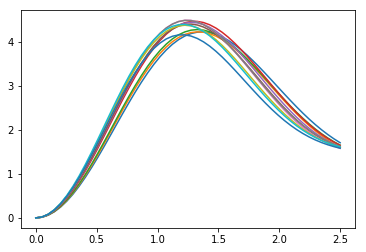

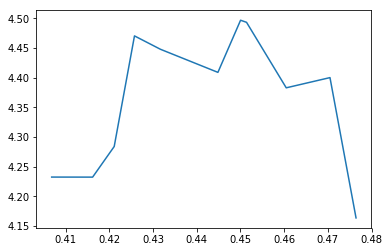

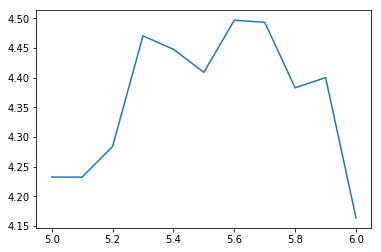

[0.45002359 5.6        4.49651671 1.2244898 ]
5120000
Working on N512, L6.2
5120000
Working on N512, L6.3


KeyboardInterrupt: 

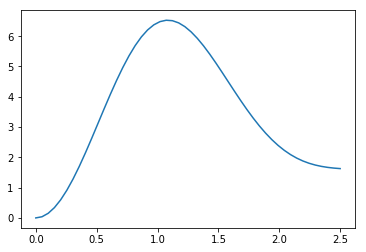

In [2]:
N = [512, 1024]
L = []
#L.append(np.arange(3.5, 4.5+0.1, 0.1))
#L.append(np.arange(3.5, 4.5+0.1, 0.1))
#L.append(np.arange(4.5, 5.5+0.1, 0.1))
#L.append(np.arange(5.0, 6.0+0.1, 0.1))
L.append(np.arange(6.3, 7.2+0.1, 0.1))
L.append(np.arange(7.6, 8.3+0.1, 0.1))
dt = 0
startingTime = 10000
maxTime = 20000
kValues = np.linspace(0, 2.5, num=50)
particlesFolder = '0delay'

def run_for_n(n, L, save=False):
    
    timestr = time.strftime("%Y%m%d-%H%M%S")
    susciesFname = 'N{0}_dt{1}_{2}.txt'.format(n, dt, timestr)
    susciesFpath = os.path.join( 'suscies', particlesFolder, susciesFname )
    suscies = np.zeros( (len(L), 4) )
    
    with open(susciesFpath, 'a+') as f:
        if save:
            f.write('# x(nearest neigh), L(box size), suscept, k_max\n')
        for i, l in enumerate(L):
            statCorr, x = calculate_stat_corr(n, l, dt, startingTime, maxTime, kValues, particlesFolder)
            suscies[i] = np.array([ x, l, np.max(statCorr), kValues[np.argmax(statCorr)] ])
            if save:
                np.savetxt(f, suscies[i].reshape(1, suscies[i].shape[0]) )

            plt.plot(kValues, statCorr)
        plt.show()

    plt.plot( suscies[:, 0], suscies[:, 2] )
    plt.show()
    plt.plot( L, suscies[:, 2] )
    plt.show()
    print(suscies[np.argmax(suscies[:, 2])])
    
for i, n in enumerate(N):
    run_for_n(n, L[i])

## Spatio-temporal correlations

320000
Reached t = 0 / 300 in 0.000s


C:\DevelopiNation\vicsek_timedelay-2\correlation.py:346: RuntimeWarning: invalid value encountered in true_divide
  checkZero = np.where(kr>0, np.sin(kr)/kr, 1.)


9997
Reached t = 3 / 300 in 7.763s
9994
Reached t = 6 / 300 in 4.419s
9991
Reached t = 9 / 300 in 3.884s
9988
Reached t = 12 / 300 in 3.938s
9985
Reached t = 15 / 300 in 3.846s
9982
Reached t = 18 / 300 in 3.932s
9979
Reached t = 21 / 300 in 4.084s
9976
Reached t = 24 / 300 in 4.075s
9973
Reached t = 27 / 300 in 4.551s
9970
Reached t = 30 / 300 in 3.780s
9967
Reached t = 33 / 300 in 3.923s
9964
Reached t = 36 / 300 in 4.001s
9961
Reached t = 39 / 300 in 4.072s
9958
Reached t = 42 / 300 in 4.074s
9955
Reached t = 45 / 300 in 3.976s
9952
Reached t = 48 / 300 in 3.825s
9949
Reached t = 51 / 300 in 3.824s
9946
Reached t = 54 / 300 in 3.974s
9943
Reached t = 57 / 300 in 3.927s
9940
Reached t = 60 / 300 in 3.818s
9937
Reached t = 63 / 300 in 3.991s
9934
Reached t = 66 / 300 in 3.909s
9931
Reached t = 69 / 300 in 3.802s
9928
Reached t = 72 / 300 in 4.471s
9925
Reached t = 75 / 300 in 3.848s
9922
Reached t = 78 / 300 in 4.615s
9919
Reached t = 81 / 300 in 3.996s
9916
Reached t = 84 / 300 in 3.

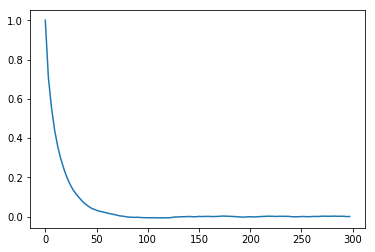

640000
Reached t = 0 / 300 in 0.000s
9997
Reached t = 3 / 300 in 6.475s
9994
Reached t = 6 / 300 in 4.962s
9991
Reached t = 9 / 300 in 4.950s
9988
Reached t = 12 / 300 in 4.814s
9985
Reached t = 15 / 300 in 5.287s
9982
Reached t = 18 / 300 in 5.260s
9979
Reached t = 21 / 300 in 5.214s
9976
Reached t = 24 / 300 in 5.190s
9973
Reached t = 27 / 300 in 5.302s
9970
Reached t = 30 / 300 in 4.946s
9967
Reached t = 33 / 300 in 4.843s
9964
Reached t = 36 / 300 in 5.156s
9961
Reached t = 39 / 300 in 4.981s
9958
Reached t = 42 / 300 in 5.132s
9955
Reached t = 45 / 300 in 5.121s
9952
Reached t = 48 / 300 in 5.153s
9949
Reached t = 51 / 300 in 4.811s
9946
Reached t = 54 / 300 in 5.214s
9943
Reached t = 57 / 300 in 5.000s
9940
Reached t = 60 / 300 in 5.552s
9937
Reached t = 63 / 300 in 4.782s
9934
Reached t = 66 / 300 in 5.098s
9931
Reached t = 69 / 300 in 4.974s
9928
Reached t = 72 / 300 in 4.743s
9925
Reached t = 75 / 300 in 4.676s
9922
Reached t = 78 / 300 in 4.739s
9919
Reached t = 81 / 300 in 5

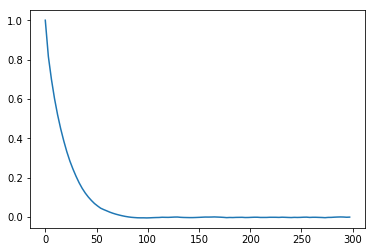

1280000
Reached t = 0 / 300 in 0.000s
9997
Reached t = 3 / 300 in 14.508s
9994
Reached t = 6 / 300 in 12.520s
9991
Reached t = 9 / 300 in 12.251s
9988
Reached t = 12 / 300 in 11.504s
9985
Reached t = 15 / 300 in 11.258s
9982
Reached t = 18 / 300 in 11.125s
9979
Reached t = 21 / 300 in 11.510s
9976
Reached t = 24 / 300 in 10.982s
9973
Reached t = 27 / 300 in 11.041s
9970
Reached t = 30 / 300 in 11.150s
9967
Reached t = 33 / 300 in 11.272s
9964
Reached t = 36 / 300 in 10.923s
9961
Reached t = 39 / 300 in 10.448s
9958
Reached t = 42 / 300 in 11.172s
9955
Reached t = 45 / 300 in 11.027s
9952
Reached t = 48 / 300 in 11.330s
9949
Reached t = 51 / 300 in 11.255s
9946
Reached t = 54 / 300 in 10.678s
9943
Reached t = 57 / 300 in 11.106s
9940
Reached t = 60 / 300 in 11.684s
9937
Reached t = 63 / 300 in 11.159s
9934
Reached t = 66 / 300 in 11.173s
9931
Reached t = 69 / 300 in 11.254s
9928
Reached t = 72 / 300 in 10.460s
9925
Reached t = 75 / 300 in 11.523s
9922
Reached t = 78 / 300 in 11.082s
991

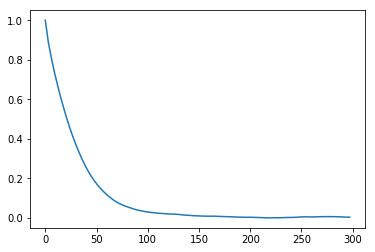

2560000
Reached t = 0 / 300 in 0.000s
9997
Reached t = 3 / 300 in 53.276s
9994
Reached t = 6 / 300 in 47.855s
9991
Reached t = 9 / 300 in 47.524s
9988
Reached t = 12 / 300 in 45.556s
9985
Reached t = 15 / 300 in 48.121s
9982
Reached t = 18 / 300 in 48.128s
9979
Reached t = 21 / 300 in 53.062s
9976
Reached t = 24 / 300 in 49.689s
9973
Reached t = 27 / 300 in 48.757s
9970
Reached t = 30 / 300 in 48.619s
9967
Reached t = 33 / 300 in 48.593s
9964
Reached t = 36 / 300 in 48.676s
9961
Reached t = 39 / 300 in 48.577s
9958
Reached t = 42 / 300 in 48.752s
9955
Reached t = 45 / 300 in 48.518s
9952
Reached t = 48 / 300 in 48.509s
9949
Reached t = 51 / 300 in 48.614s
9946
Reached t = 54 / 300 in 48.481s
9943
Reached t = 57 / 300 in 48.696s
9940
Reached t = 60 / 300 in 48.420s
9937
Reached t = 63 / 300 in 48.660s
9934
Reached t = 66 / 300 in 48.136s
9931
Reached t = 69 / 300 in 48.005s
9928
Reached t = 72 / 300 in 45.420s
9925
Reached t = 75 / 300 in 46.417s
9922
Reached t = 78 / 300 in 47.957s
991

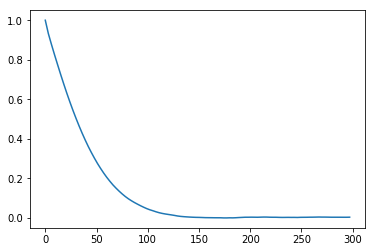

5120000
Reached t = 0 / 300 in 0.000s
9997
Reached t = 3 / 300 in 253.146s
9994
Reached t = 6 / 300 in 246.404s
9991
Reached t = 9 / 300 in 246.833s
9988
Reached t = 12 / 300 in 724.479s
9985
Reached t = 15 / 300 in 1815.760s
9982
Reached t = 18 / 300 in 1874.497s
9979
Reached t = 21 / 300 in 1830.037s
9976
Reached t = 24 / 300 in 1825.645s
9973
Reached t = 27 / 300 in 1858.669s
9970
Reached t = 30 / 300 in 1730.537s
9967
Reached t = 33 / 300 in 1868.069s
9964
Reached t = 36 / 300 in 481.691s
9961
Reached t = 39 / 300 in 390.408s
9958
Reached t = 42 / 300 in 387.861s
9955
Reached t = 45 / 300 in 398.123s
9952
Reached t = 48 / 300 in 396.403s
9949
Reached t = 51 / 300 in 401.067s
9946
Reached t = 54 / 300 in 401.533s
9943
Reached t = 57 / 300 in 386.795s
9940
Reached t = 60 / 300 in 402.370s
9937
Reached t = 63 / 300 in 395.896s
9934
Reached t = 66 / 300 in 393.371s
9931
Reached t = 69 / 300 in 383.652s
9928
Reached t = 72 / 300 in 391.179s
9925
Reached t = 75 / 300 in 392.281s
9922
Rea

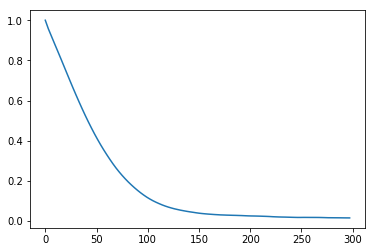

In [2]:
Ns = [32, 64, 128, 256, 512]#[1024]#[32, 64, 128, 256]
Ls = [4.6, 4.9, 6.3, 7.4, 9.3]#[10.1]#[3.6, 4.1, 5.0, 5.7]
ks = [1.73076923, 1.53846154, 1.15384615, 0.96153846, 0.76923077]#[0.69230769]#[2.14285714, 1.78571429, 1.428571429, 1.2244898]
td = 2
startingTime = 10000
maxTime = 20000
timeLength = 300
spattempFolder = '2delay'
coarseGrain = 3
save = True

for i in range(len(Ns)):
    n = Ns[i]
    l = Ls[i]
    k = ks[i]
    
    timestr = time.strftime("%Y%m%d-%H%M%S")
    spattempFname = 'N{0}_L{1}_k{2:.3f}_td{3}_tl{4}_grain{6}_{5}.txt'.format(n, l, k, td, timeLength, timestr, coarseGrain)
    spattempFpath = os.path.join('spattemps', spattempFolder, spattempFname)
    
    spattemp = calculate_spattemp_corr(n, l, td, startingTime, maxTime, timeLength, k, spattempFolder, grain=coarseGrain)
    plt.plot(spattemp[:, 0], spattemp[:, 1])
    plt.show()
    
    if(save):
        f = open(spattempFpath, 'a+')
        np.savetxt(f, spattemp)
        f.close()

# Loading correlations
## Static correlations

In [13]:
N = [32, 64, 128, 256, 512]
folder = '1delay'
suscies = []

for n in N:
    filesDir = os.path.join('suscies', folder)
    for file in os.listdir(filesDir):
        if file.startswith('N{}'.format(n)):
            print(file)
            suscies.append(np.genfromtxt(os.path.join(filesDir, file)))
            
#suscies=suscies[:-1]

N32_dt1_20190409-013949.txt
N64_dt1_20190409-020219.txt
N128_dt1_20190409-030523.txt
N256_dt1_20190409-091745.txt
N512_dt1_20190409-165155.txt


## Spatio-temporal correlations

N32_L3.6_k2.143_td0_tl300_grain1_20190409-013705.txt
N64_L4.1_k1.786_td0_tl300_grain1_20190409-015525.txt
N128_L5.0_k1.429_td0_tl300_grain1_20190409-022902.txt
N256_L5.7_k1.224_td0_tl300_grain1_20190409-033818.txt


(0, 10)

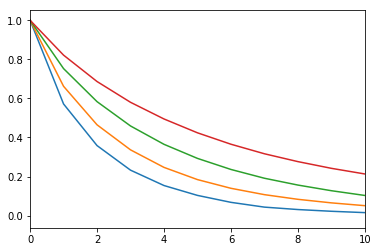

In [4]:
N = [32, 64, 128, 256]
L = [3.6, 4.1, 5.0, 5.7]
timeLength = 300
folder = '0delay'
grain = 1

spattemp = []
times = []
ks = [2.14285714, 1.78571429, 1.428571429, 1.2244898]

filesDir = os.path.join('spattemps', folder)
for n, l in zip(N, L):
    for file in os.listdir(filesDir):
        if file.startswith('N{}_L{}'.format(n, l)) and 'grain{}'.format(grain) in file:
            print(file)
            sptm = np.genfromtxt(os.path.join(filesDir, file))
            spattemp.append(sptm[:, 1])
            times.append(sptm[:, 0])
            plt.plot(sptm[:, 0], sptm[:, 1])
            
plt.xlim(0, 10)

# Analysing correlations
## Static correlations

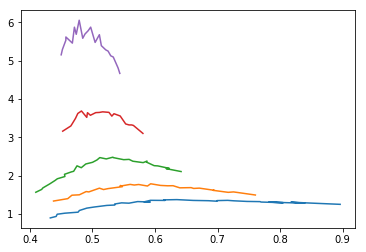

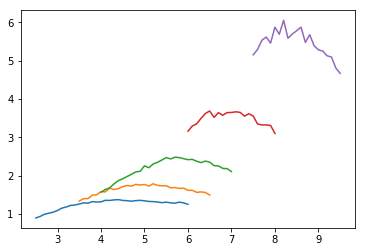

In [14]:
for susc in suscies:
    plt.plot(susc[:, 0], susc[:, 2])
plt.show()

for susc in suscies:
    plt.plot(susc[:, 1], susc[:, 2])
plt.show()

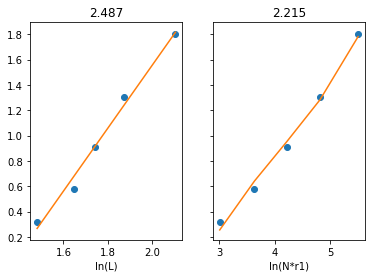

Using maximum at L=4.4 and k=1.9387755102040818
Using maximum at L=5.2 and k=1.5816326530612246
Using maximum at L=5.7 and k=1.3265306122448979
Using maximum at L=6.5 and k=1.1224489795918369
Using maximum at L=8.2 and k=0.8673469387755102


In [15]:
def line(x, a, b):
    return a*x + b

def line2(x, a, b, c):
    return (a)*x[0] + (b)*x[1] + c

N = [32, 64, 128, 256, 512]
maxima = np.zeros( (len(N), 4) )
for i, susc in enumerate(suscies):
    maxima[i] = ( susc[ np.argmax( susc[:, 2] ) ] )
    
# optimise max value by hand...:
#maxima[1] = suscies[1][15]
#maxima[2] = suscies[2][18]
#maxima[3] = suscies[3][11]
    
popt, pcov = fit.curve_fit( line, np.log(maxima[:, 1]), np.log(maxima[:, 2]) )
popt2, pcov2 = fit.curve_fit( line2, [np.log(N), np.log(maxima[:, 0])], np.log(maxima[:, 2]) )
    
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot( np.log( maxima[:, 1] ), np.log( maxima[:, 2] ), 'o' )
ax1.plot( np.log( maxima[:, 1] ), line( np.log( maxima[:, 1] ), *popt ) )
ax1.set_title('{:.3f}'.format(popt[0]))
ax1.set_xlabel('ln(L)')
ax2.plot( np.log( N*maxima[:, 0] ), np.log( maxima[:, 2] ), 'o' )
ax2.plot( np.log( N*maxima[:, 0] ), line2( [np.log(N), np.log(maxima[:, 0])], *popt2 ) )
ax2.set_title('{:.3f}'.format(popt2[0]*3))
ax2.set_xlabel('ln(N*r1)')
plt.show()

for maximum in maxima:
    print('Using maximum at L={:.1f} and k={}'.format( maximum[1], maximum[3] ) )

## Spatio-temporal correlations

[2.927711106382113, 3.732290406389172, 4.9571506014874585, 7.007477863968475]
[2.0591837542994336, 2.941620231538796, 4.2075856601246455, 6.651079540950907]


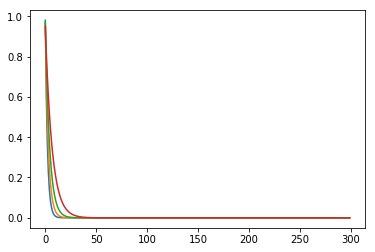

1.514430674462214 -2.204555898666609
[0.01957681 0.00531158]
2.021621924321691 -2.244090147698433
[0.03149434 0.00854505]


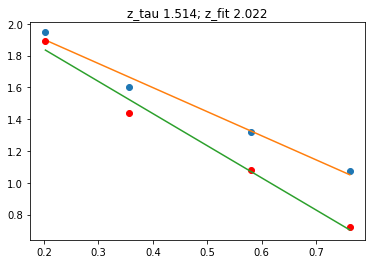

In [9]:
def line(x, a, b):
    return a*x + b

def func(tau, time, C):
    C = C[1:]
    time = time[1:]
    return  ( 1/tau + grain*np.sum(1/(time)*np.sin(time/tau)*C) ) - np.pi/4

def exp(time, tau, a, b):
    return a + b*np.exp(-1/tau*time)

taus = []
tausFit = []

for t, sptm in zip(times, spattemp):
    tau = fit.root( func, 3., args=(t, sptm) )
    popt, pcov = fit.curve_fit(exp, t, sptm)
    plt.plot( t, exp(t, *popt) )
    taus.append( tau.x[0] )
    tausFit.append( popt[0] )
print(taus)
print(tausFit)
plt.show()

popt, pcov = fit.curve_fit(line, np.log(ks), np.log(taus))
popt2, pcov2 = fit.curve_fit(line, np.log(ks), np.log(tausFit))
print(*-popt)
print(np.diag(pcov))
print(*-popt2)
print(np.diag(pcov2))

z = -popt[0]
z2 = -popt2[0]

plt.title('z_tau {:.3f}; z_fit {:.3f}'.format(z, z2))
plt.plot(np.log(ks), np.log(taus), 'o')
plt.plot(np.log(ks), line(np.log(ks), *popt))
plt.plot(np.log(ks), np.log(tausFit), 'ro')
plt.plot(np.log(ks), line(np.log(ks), *popt2))
plt.show()

(-1, 80)

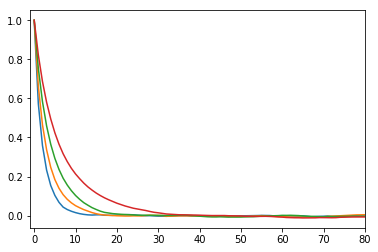

In [6]:
for t, spttmp in zip(times, spattemp):
    plt.plot(t, spttmp)
    
plt.xlim(-1, 80)
#plt.ylim(-0.1, 1.1)

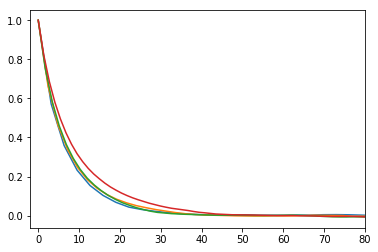

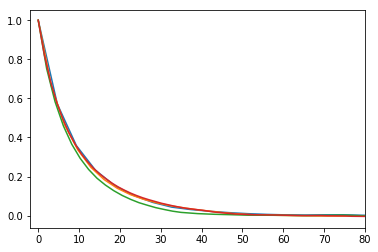

In [7]:
for k, t, spttmp in zip(ks, times, spattemp):
    plt.plot(t*k**z, spttmp)
plt.xlim(-2, 80)
plt.show()
for k, t, spttmp in zip(ks, times, spattemp):
    plt.plot(t*k**z2, spttmp)
plt.xlim(-2, 80)
plt.show()